In [1]:
from data_loaders import load_and_merge
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots
from forecast_helpers import ForecastConfig, forecast_by_category, plot_total_panel, plot_category_panels, make_summary_table, setup_plot_style
merged_df = load_and_merge()

In [2]:
%matplotlib inline
plot_dims = setup_plot_style()

In [3]:
merged_df.head()

,Namespace,Incident ID,Published,Risk Domain,Risk Subdomain,Entity,Timing,Intent,_id,incident_id,date,reports,Alleged deployer of AI system,Alleged developer of AI system,Alleged harmed or nearly harmed parties,description,title
26,MIT,27,True,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness,Human,Post-deployment,Unintentional,ObjectId(625763df343edc875fe63a19),27,1983-09-26,"[342,343,344,345,346,347,349,350,351,352,353,3...","[""soviet-union""]","[""soviet-union""]","[""all-life-on-earth""]",An alert of five incoming intercontinental bal...,Nuclear False Alarm
370,MIT,379,True,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness,Human,Post-deployment,Unintentional,ObjectId(636218985a33233a22f6632e),379,1992-05-25,"[2179,2180]","[""pepsi""]","[""d.g.-consultores""]","[""filipinos""]",Pepsi's number generation system determining d...,Error in Pepsi's Number Generation System Led ...
41,MIT,42,True,5. Human-Computer Interaction,5.2. Loss of human agency and autonomy,Human,Pre-deployment,Intentional,ObjectId(625763e0343edc875fe63a28),42,1996-04-03,"[759,2471]","[""national-resident-matching-program""]","[""national-resident-matching-program""]","[""medical-residents""]","Alvin Roth, a Ph.D at the University of Pittsb...",Inefficiencies in the United States Resident M...
42,MIT,43,True,1. Discrimination and Toxicity,1.1. Unfair discrimination and misrepresentation,AI,Post-deployment,Unintentional,ObjectId(625763e0343edc875fe63a29),43,1998-03-05,"[762,763,764,765]","[""st-george's-hospital-medical-school""]","[""dr.-geoffrey-franglen""]","[""women"",""minority-groups""]","From 1982 to 1986, St George's Hospital Medica...",Racist AI behaviour is not a new problem
78,MIT,79,True,1. Discrimination and Toxicity,1.3. Unequal performance across groups,Human,Post-deployment,Unintentional,ObjectId(625763e4343edc875fe63a4d),79,1999-03-16,"[1379,1736,2039]","[""chronic-kidney-disease-epidemiology-collabor...","[""chronic-kidney-disease-epidemiology-collabor...","[""black-patients"",""african-american-patients""]",Decades-long use of the estimated glomerular f...,Kidney Testing Method Allegedly Underestimated...


## Risk Domain

/home/slim/apart/ai-incident-forecasting/src/forecast_helpers.py:303: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby(["__year", "__cat"])["__val"]
/home/slim/apart/ai-incident-forecasting/src/forecast_helpers.py:312: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby([pd.Grouper(key=date_col, freq="MS"), "__cat"])["__val"]
/home/slim/miniforge3/envs/timaeus/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid

years_hist: [2019 2020 2021 2022 2023 2024]
y_total: [ 43.  84.  75.  98. 149. 215.]
w_year: [  2.718   7.389  20.086  54.598 148.413 403.429]
share weight quantiles: [0.04839867 0.04839867 0.12805084 0.33879068 3.43048038 8.59551742]


/home/slim/apart/ai-incident-forecasting/src/forecast_helpers.py:1006: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/slim/apart/ai-incident-forecasting/src/forecast_helpers.py:1161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


,Actual_2021,Actual_2022,Actual_2023,Actual_2024,Actual_2025,Pred_2025,Pred_2026,Pred_2027,Pred_2028,Pred_2029,Pred_2030
1. Discrimination and Toxicity,19,21,19,26,<NA>,37,52,72,98,133,181
2. Privacy & Security,4,8,14,12,<NA>,30,40,53,70,93,123
3. Misinformation,1,11,31,40,<NA>,64,92,133,194,286,419
4. Malicious Actors & Misuse,4,11,39,83,<NA>,76,118,186,291,453,691
5. Human-Computer Interaction,10,11,7,10,<NA>,30,43,63,92,133,190
6. Socioeconomic & Environmental Harms,2,5,5,4,<NA>,20,27,36,47,62,82
"7. AI system safety, failures, and limitations",35,31,34,40,<NA>,42,59,81,111,150,206
Total,75,98,149,215,<NA>,302,438,628,907,1318,1902


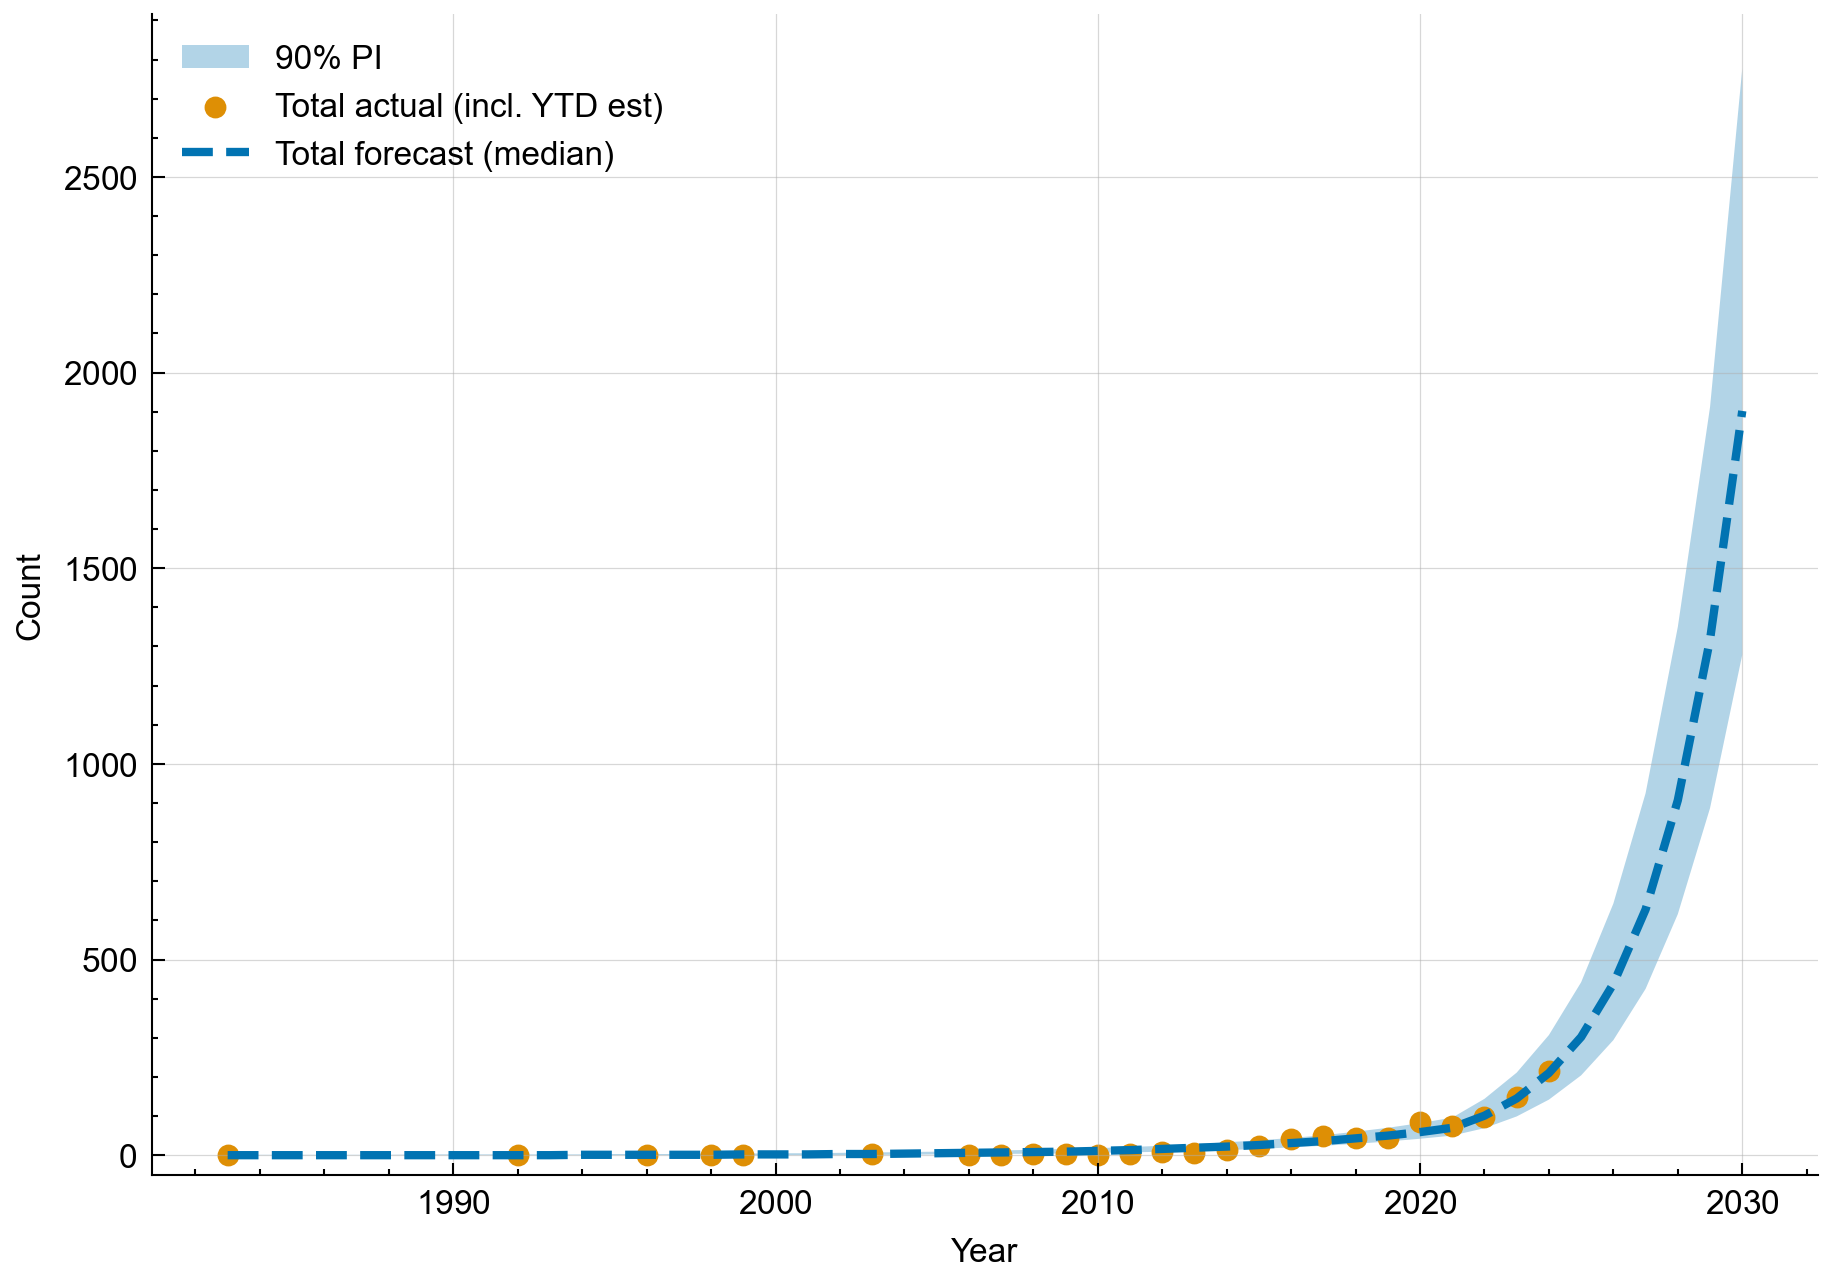

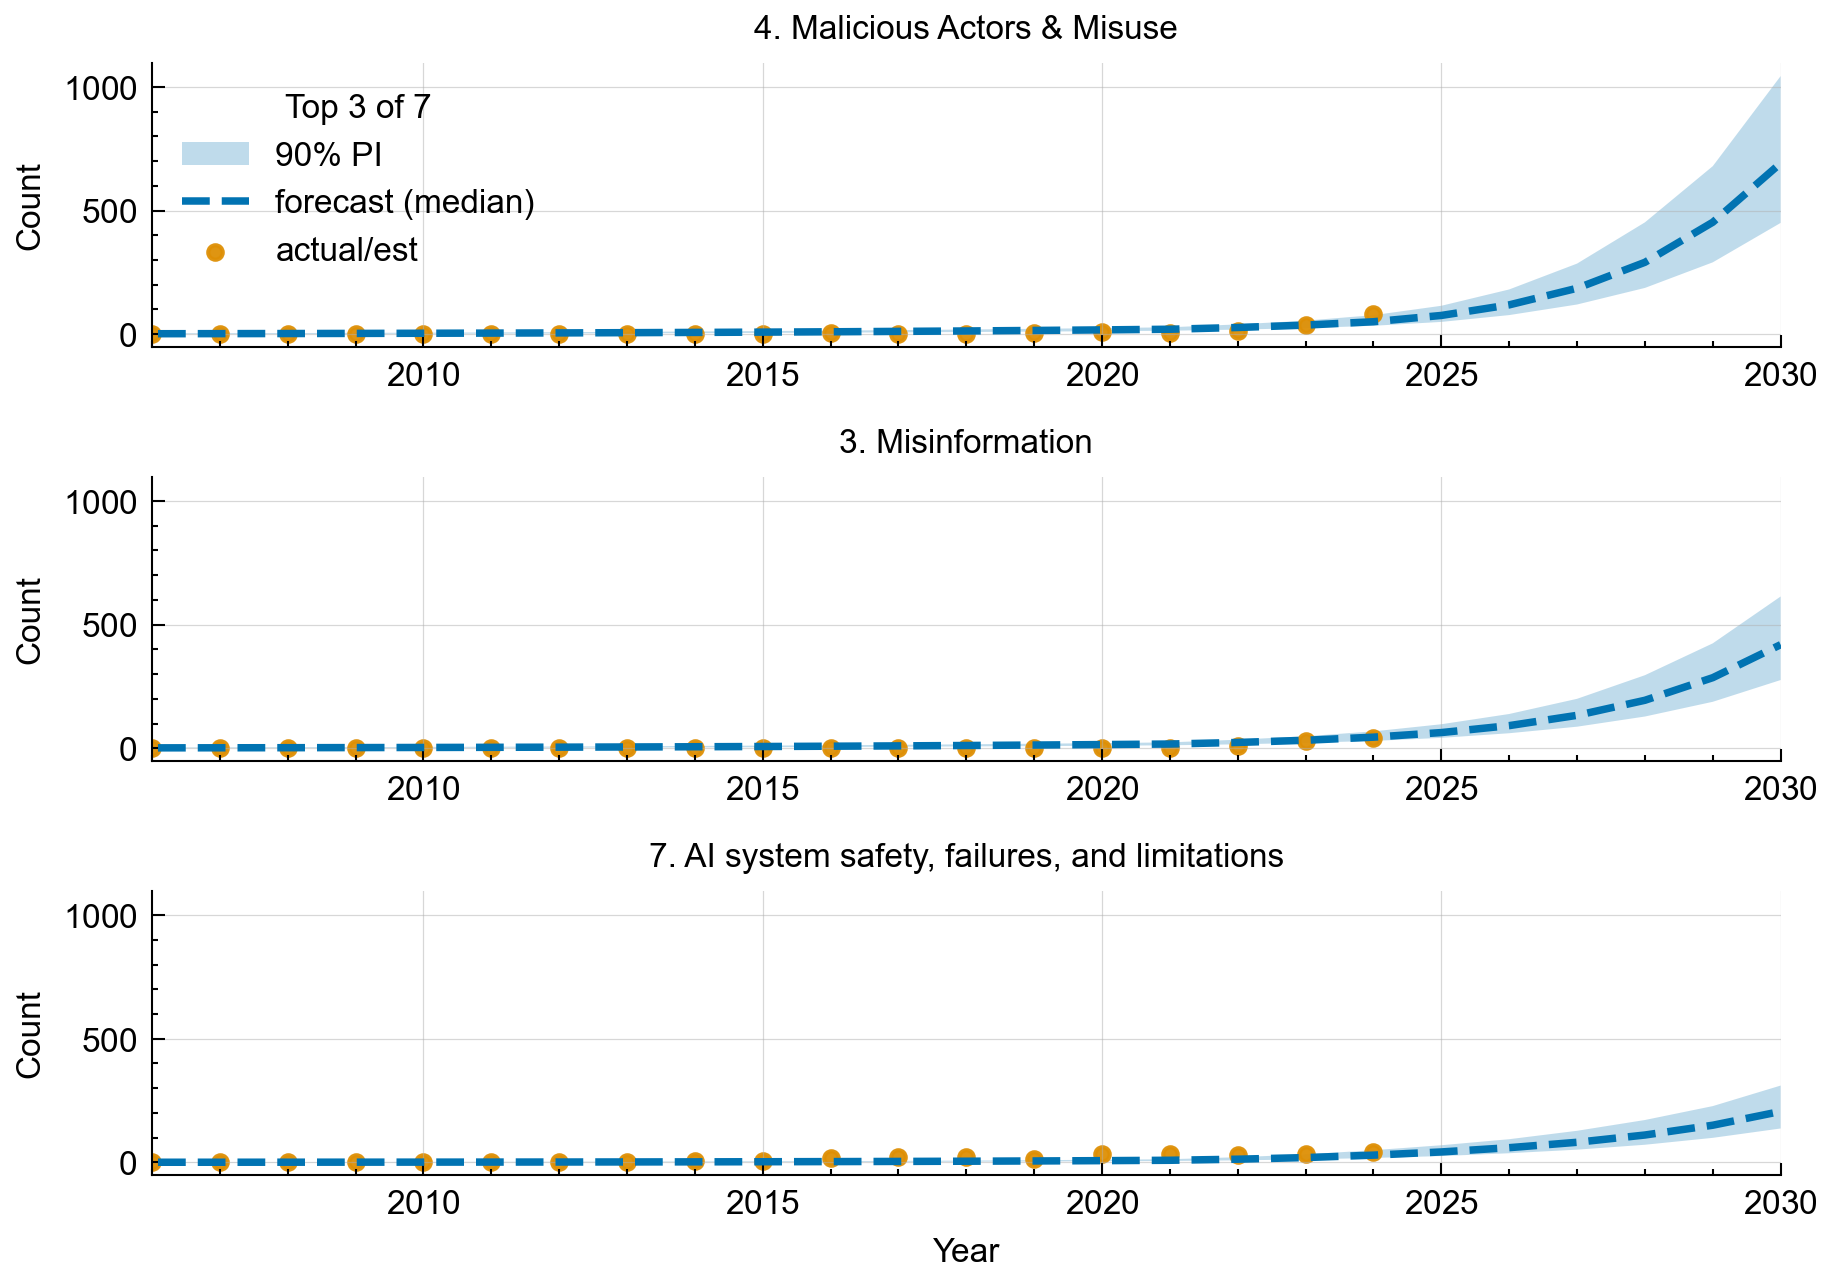

In [4]:
cfg = ForecastConfig(
    MAX_KNOTS_TOTAL=6,
    MAX_KNOTS_SHARES=4,
    ALPHA_TOTAL=0.005,
    TAU_YEARS=5.0,
    W_HIST_MAX=0.4,
    W_UNIF_MAX=0.2,
    MOM_TILT_MAX=0.7,
    MOM_TAU=3,
    RECENT_WIN=7,
    CAT_BOOST_SURGE=7,
    GROWTH_FLOOR_FRAC=0.07,
    SHARE_KAPPA=35,
    # from calibration_analysis.ipynb
    B_SIM=5000,                    # Increased for stability
    CONFIDENCE_LEVEL=0.90,         
    BOOTSTRAP_ITERS=500,           
    MIN_PI_WIDTH=0.2,              
    GROWTH_UNCERTAINTY_FACTOR=1,  # Calibrated value 0.686,
    YTD_YEAR=2025,
    MONOTONE_TOTALS=False,
    NO_DIP_FIRST_YEAR=False,
    NONDECREASING_CATEGORIES=False,
    ASSIMILATE_YTD=False # True for production
)
res_rd = forecast_by_category(
    merged_df, date_col="date", cat_col="Risk Domain", config=cfg
)
plot_total_panel(res_rd)
plot_category_panels(res_rd, top_k=3)
make_summary_table(res_rd)

## Alleged Deployer (broken)

In [5]:
cfg = ForecastConfig(YTD_YEAR=2025)
res_rd = forecast_by_category(merged_df, date_col="date", cat_col="Alleged deployer of AI system", config=cfg)
plot_total_panel(res_rd)
plot_category_panels(res_rd, top_k=8)

/home/slim/apart/ai-incident-forecasting/src/forecast_helpers.py:303: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby(["__year", "__cat"])["__val"]
/home/slim/apart/ai-incident-forecasting/src/forecast_helpers.py:312: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby([pd.Grouper(key=date_col, freq="MS"), "__cat"])["__val"]
/home/slim/miniforge3/envs/timaeus/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid

years_hist: [2019 2020 2021 2022 2023 2024]
y_total: [ 43.  84.  75.  98. 149. 215.]
w_year: [ 1.     1.     1.     2.718  7.389 20.086]
share weight quantiles: [0.79072503 0.79072503 0.79072503 0.79072503 1.54012207 2.99974818]


AttributeError: 'list' object has no attribute 'get_loc'